# Test FZ filter

## Parse AMS PWS data

use code from training school

In [50]:
import pandas as pd

df_data = pd.read_csv('AMS_dataset.zip', sep=',', index_col='Time', parse_dates=True)

df_metadata =  pd.read_csv('AMS_metadata.csv', sep=',', index_col='ID' )
df_metadata.index = 'ams' + df_metadata.index.astype(str)

In [114]:
df_data.head()

,ams1,ams2,ams3,ams4,ams5,ams6,ams7,ams8,ams9,ams10,...,ams125,ams126,ams127,ams128,ams129,ams130,ams131,ams132,ams133,ams134
Time,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:05:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:10:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:15:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:20:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2016-05-01 00:25:00,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [52]:
df_metadata.head()

,lon,lat
ID,,
ams1,4.670664,52.305896
ams2,4.674940,52.302044
ams3,4.677275,52.308427
ams4,4.677554,52.346013
ams5,4.678593,52.318572


In [53]:
import scipy


# This isn not correct since we use lon-lat and not projected coordinates...
distance_matrix = scipy.spatial.distance_matrix(df_metadata.values, df_metadata.values)

df_distance_matrix = pd.DataFrame(
    index=df_metadata.index,
    columns=df_metadata.index,
    data=distance_matrix)
df_distance_matrix

ID,ams1,ams2,ams3,ams4,ams5,ams6,ams7,ams8,ams9,ams10,...,ams125,ams126,ams127,ams128,ams129,ams130,ams131,ams132,ams133,ams134
ID,,,,,,,,,,,,,,,,,,,,,
ams1,0.000000,0.005755,0.007079,0.040704,0.014951,0.011353,0.012118,0.024180,0.025316,0.061542,...,0.308785,0.313675,0.328607,0.347164,0.359986,0.360168,0.361374,0.385974,0.370516,0.376754
ams2,0.005755,0.000000,0.006797,0.044046,0.016927,0.005621,0.006418,0.018568,0.019796,0.056255,...,0.304804,0.310169,0.323730,0.344538,0.355295,0.355992,0.357133,0.383216,0.366216,0.372086
ams3,0.007079,0.006797,0.000000,0.037587,0.010230,0.010729,0.011604,0.020569,0.021293,0.061349,...,0.302027,0.306727,0.322570,0.340086,0.353740,0.353516,0.354762,0.378900,0.363943,0.370485
ams4,0.040704,0.044046,0.037587,0.000000,0.027460,0.048244,0.049104,0.054316,0.054103,0.097571,...,0.301831,0.302333,0.331443,0.328602,0.360238,0.354735,0.356594,0.368147,0.366294,0.376626
ams5,0.014951,0.016927,0.010230,0.027460,0.000000,0.020792,0.021648,0.028167,0.028374,0.070644,...,0.300270,0.303860,0.323348,0.335435,0.353886,0.352210,0.353623,0.374472,0.362956,0.370549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ams130,0.360168,0.355992,0.353516,0.354735,0.352210,0.352492,0.352321,0.339903,0.338175,0.339130,...,0.053712,0.069835,0.075021,0.119078,0.050289,0.000000,0.005999,0.118414,0.015446,0.051664
ams131,0.361374,0.357133,0.354762,0.356594,0.353623,0.353560,0.353375,0.340889,0.339172,0.339353,...,0.056668,0.074834,0.070643,0.125058,0.044532,0.005999,0.000000,0.124227,0.010683,0.045680
ams132,0.385974,0.383216,0.378900,0.368147,0.374472,0.381245,0.381350,0.370836,0.369007,0.383550,...,0.119311,0.090380,0.188397,0.039884,0.168700,0.118414,0.124227,0.000000,0.129853,0.168231


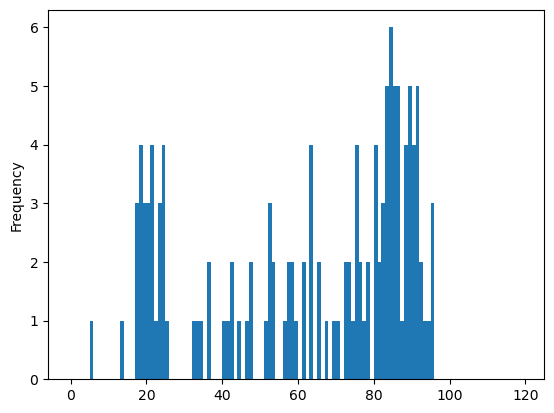

In [54]:
(df_distance_matrix < 0.1).sum().plot.hist(bins=np.arange(0, 120));

## Select one PWS and its neigbours within certain radius

In [93]:
pws_id = 'ams2'

neighbors_within_distance =  df_distance_matrix[pws_id] < 0.1 # note that this is in degeree lon-lat currently...

neighbor_ids = df_distance_matrix.index.values[neighbors_within_distance]
neighbor_ids

array(['ams1', 'ams2', 'ams3', 'ams4', 'ams5', 'ams6', 'ams7', 'ams8',
       'ams9', 'ams10', 'ams11', 'ams12', 'ams13', 'ams14', 'ams15',
       'ams19', 'ams20', 'ams21'], dtype=object)

In [94]:
n1 = 143999
n2 = 144036

df_selected = df_data[pws_id][n1:n2]
df_neighbors = df_data[neighbor_ids][n1:n2]

In [116]:
df_selected.head()

Time
2017-09-13 00:00:00    0.0
2017-09-13 00:05:00    0.0
2017-09-13 00:10:00    0.0
2017-09-13 00:15:00    0.0
2017-09-13 00:20:00    0.0
Name: ams2, dtype: float64

In [120]:
df_neighbors.median(axis=1).head()

Time
2017-09-13 00:00:00    0.101000
2017-09-13 00:05:00    0.251361
2017-09-13 00:10:00    0.101043
2017-09-13 00:15:00    0.000000
2017-09-13 00:20:00    0.050120
dtype: float64

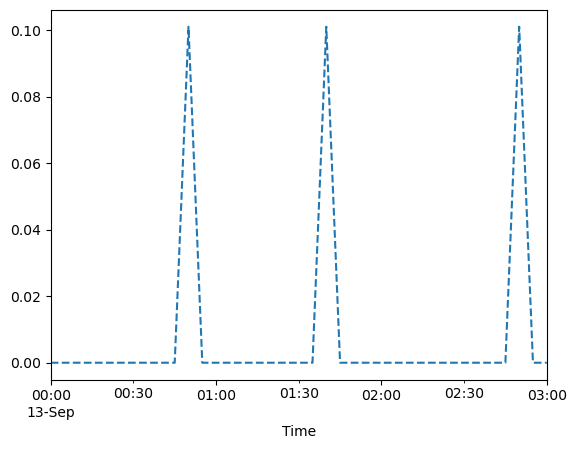

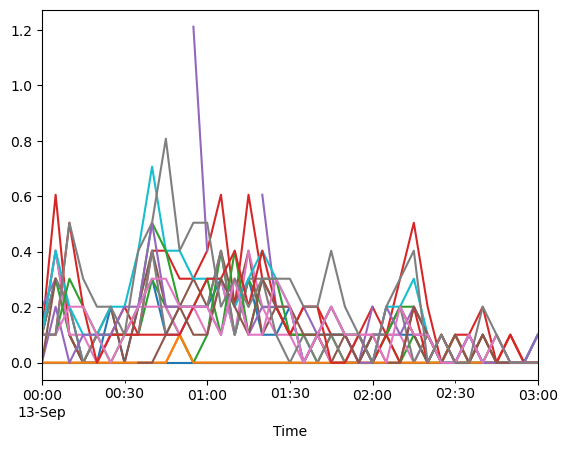

In [95]:
df_selected.plot(linestyle='--')
df_neighbors.plot(legend=False);

## run FZ filter code from training school

In [124]:
import numpy as np

def FZ_filter(pws_data, reference, nint=6):
    
    Ref_array=np.zeros(np.shape(pws_data))
    Ref_array[np.where(reference>0)]=1
    
    Sensor_array=np.zeros(np.shape(pws_data))
    Sensor_array[np.where(pws_data>0)]=1
    Sensor_array[np.where(pws_data==0)]=0
    
    FZ_array=np.ones(np.shape(pws_data))*-1

    for i in np.arange(nint,np.shape(pws_data)[0]):
        #print(i)
        if len(np.ma.compressed(Ref_array[i]))==0: #als de vergelijkende waarde niet bestaat:
                FZ_array[i]=-1
        elif len(np.ma.compressed(Sensor_array[i]))==0: #als de meting een NAN is, dan vorige meting overnemen
                FZ_array[i]=FZ_array[i-1]
        else: #als er genoeg goede metingen zijn:
            if Sensor_array[i]>0: #als er regen valt, geen FZ vlag
                FZ_array[i]=0
            else:
                if FZ_array[i-1]==1: #als er geen regen valt en vorige meting ook al FZ, dan wederom afvlaggen
                    FZ_array[i]=1
                elif np.sum(Sensor_array[i-nint:i+1]) >0: #als er geen regen valt, maar ergens in het voorgaande wel: neit afvlaggen
                    FZ_array[i]=0
                else: #als er een serie nullen is van nint lengte
                    if np.sum(Ref_array[i-nint:i+1]) <nint+1: #als de radar ook minstens af en toe nul of aangeeft: dan is alles prima, of is bepaald zonder nstat stations
                        FZ_array[i]=0
                    else: #dus als de sensor nul aangeeft, maar de radar niet nul (continu) in die periode
                        FZ_array[i]=1
     
    return FZ_array 

In [128]:
df_selected.values

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.101, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.101, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.101, 0.   ,
       0.   ])

In [131]:
df_neighbors.median(axis=1).values

array([0.101     , 0.25136087, 0.1010425 , 0.        , 0.05012029,
       0.101     , 0.101     , 0.101     , 0.303     , 0.20048115,
       0.202     , 0.202     , 0.202     , 0.303     , 0.202     ,
       0.202     , 0.202     , 0.202     , 0.101     , 0.05012029,
       0.101     , 0.10062029, 0.0505    , 0.        , 0.        ,
       0.101     , 0.101     , 0.101     , 0.0505    , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [134]:
fz_filter_results = FZ_filter(
    pws_data=df_selected.values, 
    reference=df_neighbors.median(axis=1).values,
    nint=6,
)
fz_filter_results

array([-1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

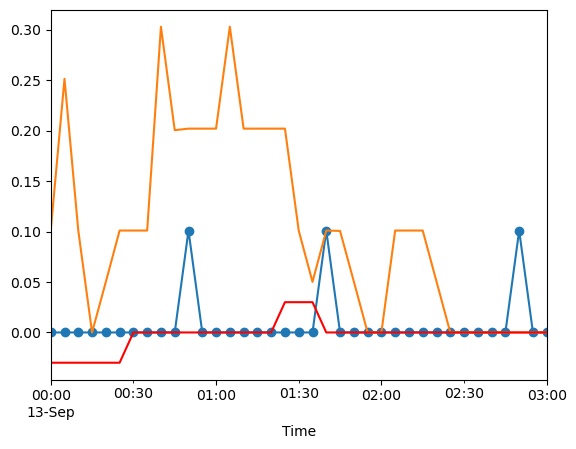

In [126]:
df_selected.plot(marker='o')
df_neighbors.median(axis=1).plot()

df_fz_filter_results = pd.Series(index=df_selected.index, data=fz_filter_results)
(0.03 * df_fz_filter_results).plot(color='r');

# Check what `np.ma.compressed` does

In [140]:
# Set up a simple array with a NaN
x = np.array([0.1, 0.2, 0.1 , np.NaN , 0.0])
x

array([0.1, 0.2, 0.1, nan, 0. ])

In [145]:
# This just returns the NaN at index 3
np.ma.compressed(x[3])

array([nan])

In [147]:
# As a results, length is 1
len(np.ma.compressed(x[3]))

1

In [158]:
# Now create a "masked" array with the NaN at index 3 masked out
x_masked = np.ma.array(x, mask=np.isnan(x))
x_masked

masked_array(data=[0.1, 0.2, 0.1, --, 0.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

In [159]:
# Now an empty array is returned at index 3
np.ma.compressed(x_masked[3])

array([], dtype=float64)

In [160]:
# As a results, length is now 0 here
len(np.ma.compressed(x_masked[3]))

0